In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as smp
import plotly 
import pandas as pd
import pickle
import edist.ted as ted
from sklearn.preprocessing import MinMaxScaler

import sys
sys.path.append("../src")
import utils
import ExpressionTree

In [6]:
def t1(X):
    return 10*np.exp(-0.5*np.exp(-0.5*X + 2))
X1 = np.linspace(-5, 15, 140)
y1 = t1(X1)

def t2(X):
    return np.exp(-X)
X2 = np.linspace(1, 20, 140)
y2 = t2(X2)

air_passengers = pd.read_csv("data/AirPassengers.csv")
X3 = air_passengers.index
y3 = air_passengers["#Passengers"]

treated_seco = pd.read_csv("data/treated_seco.csv")
treated_seco

treated_seco["eventdate"] = pd.to_datetime(treated_seco["eventdate"])
treated_seco.set_index("eventdate", inplace=True, drop=True)
treated_seco = treated_seco.asfreq("7D")
treated_seco.rename(columns={"Unnamed: 0": "weeks"}, inplace=True)

X4 = treated_seco.weeks[::2].values
y4 = treated_seco.value[::2].values


# sugar = yf.Ticker("SB=F")
# sugar_history = sugar.history(period="1y")
# sugar_history = sugar_history.asfreq("B")

# # Interpolando os dados
# sugar_history = sugar_history.interpolate()

# sugar_history.reset_index(inplace=True)

sugar_data_manip = pd.read_csv("data/sugar_data_manip.csv")
X5 = sugar_data_manip.X.values
y5 = sugar_data_manip.y.values

data = [
    [X3, y3],
    [X4, y4],
    [X5, y5]
]

# Looking At The Data

In [3]:
with open(r"E:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\SRRollingMetric\Outputs\Airplane\RollingMetric-120-85-0.pkl", "rb") as file:
    air_info = pickle.load(file)

air_info

{'120-119|0': 337.000000000000,
 '120-118|0': 26.999872*x0 - 2875.9849,
 '120-117|0': -2.9924748*cos(x0) + 347.25122 - 6.9382586/cos(x0),
 '120-116|0': -x0*(cos(1.04787082602924*cos(x0 + 0.20102665) - 0.379080264914319) - 3.62406237616983) + 0.330797122861223,
 '120-115|0': (x0 + sin(x0))*sin(sin(x0)) - 129.30261*cos(cos(6.3680763*exp(sin(x0)))) + 503.27554,
 '120-114|0': 0.89097375*x0*sin(x0 + sin(0.31206203*sin(28.0220640127624*x0) - 0.0192815701260686)) + 404.1245312,
 '120-113|0': -32.53463*exp(sin(exp(sin(x0)))) - 104.883484*sin(0.8648514*x0) + 468.74127,
 '120-112|0': -94.769356*sin(0.864839359115982*x0) + 1.0431145*sin(0.864839359115982*x0)/sin(3.27691845142665*x0) + 406.6079645,
 '120-111|0': (-x0*exp(0.8463448/sin(x0)) + 10082.725*sin(0.89152426*x0) + 47568.98)/x0,
 '120-110|0': -x0*sin(sin(0.865519103737658*x0) + 0.558875) - x0 + 571.07 - 4.321152/cos(x0),
 '120-109|0': 79.0705978670232*exp(sin(0.672398324464063*x0)) + 288.39035 - 1.4872137/sin(x0),
 '120-108|0': 76.696141444

In [4]:
interval = list(air_info.keys())
funcs = list(air_info.values())

air_df = pd.DataFrame()
air_df["interval"] = interval
air_df["func"] = funcs

air_df

interval                                               func
0   120-119|0                                   337.000000000000
1   120-118|0                           26.999872*x0 - 2875.9849
2   120-117|0  -2.9924748*cos(x0) + 347.25122 - 6.9382586/cos...
3   120-116|0  -x0*(cos(1.04787082602924*cos(x0 + 0.20102665)...
4   120-115|0  (x0 + sin(x0))*sin(sin(x0)) - 129.30261*cos(co...
5   120-114|0  0.89097375*x0*sin(x0 + sin(0.31206203*sin(28.0...
6   120-113|0  -32.53463*exp(sin(exp(sin(x0)))) - 104.883484*...
7   120-112|0  -94.769356*sin(0.864839359115982*x0) + 1.04311...
8   120-111|0  (-x0*exp(0.8463448/sin(x0)) + 10082.725*sin(0....
9   120-110|0  -x0*sin(sin(0.865519103737658*x0) + 0.558875) ...
10  120-109|0  79.0705978670232*exp(sin(0.672398324464063*x0)...
11  120-108|0  76.6961414448344*exp(sin(0.6727141*x0)) + 293....
12  120-107|0  29.928484*exp(1.86216701567401*sin(0.6175408*x...
13  120-106|0  13.374505*exp(exp(sin(0.4532723*x0))) - exp(ex...
14  120-105|0  37.50814*exp(sin(exp(-cos(x0))))*sin(0.5094048...
15  120-104|0  69.8985960098107*sin(0.5089702*x0) + 38.308805...
16  120-103|0  -x0*sin(0.5379676*x0 + sin(0.49160406*x0))*cos...
17  120-102|0  70.0239706056177*sin(0.50896966*x0) + 36.62919...
18  120-101|0  (x0 + (23.666496*sin(x0) + 299.32013)*exp(sin(...
19  120-100|0  -65.6498576005351*sin(0.5365837*x0) + 37.77919...
20   120-99|0  0.108493675285524*x0*exp(-3.109978*sin(sin(0.5...
21   120-98|0  330.90958 + 17.1764420794552*exp(-2.2561857393...
22   120-97|0  -1.0*x0*sin(2.201383 - 1.0*exp(-sin(0.53615953...
23   120-96|0  x0*sin(sin(0.50887007*x0) - cos(sin(0.53408056...
24   120-95|0  0.379419092450352*x0*exp(-1.4738922*sin(0.5366...
25   120-94|0  0.738301751926712*x0*exp(-cos(exp(-cos(0.52199...
26   120-93|0  x0 + 12.438251853455*exp(exp(sin(0.50759380638...
27   120-92|0  1.0*x0/sin(exp(-sin(sin(0.507960838454383*x0))...
28   120-91|0  2.71334488132915*x0*exp(sin(sin(0.509155610734...
29   120-90|0  2.50195303278495*x0*exp(0.504746510008776*sin(...
30   120-89|0  x0*exp(cos(1.89582552490195*sin(sin(cos(0.2612...
31   120-88|0  x0 + 149.185768823518*exp(exp(-sin(cos(0.52188...
32   120-87|0  2.7305326*x0 + 1.8126134 + 62.4643796874832*ex...
33   120-86|0  x0 + 11.3903134860549*exp(exp(-cos(0.521923528...
34   120-85|0  (x0 + (x0 + 18.1020192150762*sin(x0) + 183.273...

In [5]:
x0 = smp.symbols("x0")

air_ys = []
air_X = np.linspace(0, 400, 401)

for i, row in air_df.iterrows():
    lamb = smp.lambdify([x0], row.func)   
    y = lamb(air_X)
    air_ys.append(np.array(y))

air_df["y"] = air_ys
    

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in divide
  return -94.769356*sin(0.864839359115982*x0) + 1.0431145*sin(0.864839359115982*x0)/sin(3.27691845142665*x0) + 406.6079645
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in divide
  return (-x0*exp(0.8463448/sin(x0)) + 10082.725*sin(0.89152426*x0) + 47568.98)/x0
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in multiply
  return (-x0*exp(0.8463448/sin(x0)) + 10082.725*sin(0.89152426*x0) + 47568.98)/x0
<lambdifygenerated-11>:2: RuntimeWarning: divide by zero encountered in divide
  return 79.0705978670232*exp(sin(0.672398324464063*x0)) + 288.39035 - 1.4872137/sin(x0)
<lambdifygenerated-12>:2: RuntimeWarning: divide by zero encountered in divide
  return 76.6961414448344*exp(sin(0.6727141*x0)) + 293.929019317235 - 1.2106911/sin(x0)
<lambdifygenerated-13>:2: RuntimeWarning: divide by zero encountered in divide
  return 29.928484*exp(1.86216701567401*sin(0.6175408*x0)) + 32

In [6]:
air_df

interval                                               func  \
0   120-119|0                                   337.000000000000   
1   120-118|0                           26.999872*x0 - 2875.9849   
2   120-117|0  -2.9924748*cos(x0) + 347.25122 - 6.9382586/cos...   
3   120-116|0  -x0*(cos(1.04787082602924*cos(x0 + 0.20102665)...   
4   120-115|0  (x0 + sin(x0))*sin(sin(x0)) - 129.30261*cos(co...   
5   120-114|0  0.89097375*x0*sin(x0 + sin(0.31206203*sin(28.0...   
6   120-113|0  -32.53463*exp(sin(exp(sin(x0)))) - 104.883484*...   
7   120-112|0  -94.769356*sin(0.864839359115982*x0) + 1.04311...   
8   120-111|0  (-x0*exp(0.8463448/sin(x0)) + 10082.725*sin(0....   
9   120-110|0  -x0*sin(sin(0.865519103737658*x0) + 0.558875) ...   
10  120-109|0  79.0705978670232*exp(sin(0.672398324464063*x0)...   
11  120-108|0  76.6961414448344*exp(sin(0.6727141*x0)) + 293....   
12  120-107|0  29.928484*exp(1.86216701567401*sin(0.6175408*x...   
13  120-106|0  13.374505*exp(exp(sin(0.4532723*x0))) - exp(ex...   
14  120-105|0  37.50814*exp(sin(exp(-cos(x0))))*sin(0.5094048...   
15  120-104|0  69.8985960098107*sin(0.5089702*x0) + 38.308805...   
16  120-103|0  -x0*sin(0.5379676*x0 + sin(0.49160406*x0))*cos...   
17  120-102|0  70.0239706056177*sin(0.50896966*x0) + 36.62919...   
18  120-101|0  (x0 + (23.666496*sin(x0) + 299.32013)*exp(sin(...   
19  120-100|0  -65.6498576005351*sin(0.5365837*x0) + 37.77919...   
20   120-99|0  0.108493675285524*x0*exp(-3.109978*sin(sin(0.5...   
21   120-98|0  330.90958 + 17.1764420794552*exp(-2.2561857393...   
22   120-97|0  -1.0*x0*sin(2.201383 - 1.0*exp(-sin(0.53615953...   
23   120-96|0  x0*sin(sin(0.50887007*x0) - cos(sin(0.53408056...   
24   120-95|0  0.379419092450352*x0*exp(-1.4738922*sin(0.5366...   
25   120-94|0  0.738301751926712*x0*exp(-cos(exp(-cos(0.52199...   
26   120-93|0  x0 + 12.438251853455*exp(exp(sin(0.50759380638...   
27   120-92|0  1.0*x0/sin(exp(-sin(sin(0.507960838454383*x0))...   
28   120-91|0  2.71334488132915*x0*exp(sin(sin(0.509155610734...   
29   120-90|0  2.50195303278495*x0*exp(0.504746510008776*sin(...   
30   120-89|0  x0*exp(cos(1.89582552490195*sin(sin(cos(0.2612...   
31   120-88|0  x0 + 149.185768823518*exp(exp(-sin(cos(0.52188...   
32   120-87|0  2.7305326*x0 + 1.8126134 + 62.4643796874832*ex...   
33   120-86|0  x0 + 11.3903134860549*exp(exp(-cos(0.521923528...   
34   120-85|0  (x0 + (x0 + 18.1020192150762*sin(x0) + 183.273...   

                                                    y  
0                                               337.0  
1   [-2875.9849, -2848.985028, -2821.9851559999997...  
2   [337.3204866, 332.79294089509284, 365.16915019...  
3   [0.330797122861223, 2.9548595708628493, 6.4926...  
4   [433.02168248993803, 397.4552186687538, 435.15...  
5   [404.1245312, 404.90115615963094, 405.84663802...  
6   [393.2681893252949, 321.25197633038334, 305.16...  
7   [nan, 328.60554048092195, 316.8846584208885, 3...  
8   [nan, 55410.91079928475, 28710.18253916313, 16...  
9   [566.7488480000001, 561.1035527471661, 577.454...  
10  [-inf, 434.03108561146036, 496.29416433534334,...  
11  [-inf, 435.50709167372935, 495.87328675790604,...  
12  [-inf, 410.1916381405596, 495.99418041020175, ...  
13  [341.4072320776756, 369.2108080876201, 426.692...  
14  [379.13525, 442.4059299552298, 499.92700416250...  
15  [380.2532, 446.54901299212884, 474.57298112214...  
16  [411.5428, 410.9778698205449, 409.655578643456...  
17  [379.67947, 444.62299555744744, 472.5786397467...  
18  [251.66828, 291.2571045606258, 301.88224536166...  
19  [376.4234, 374.6531078331036, 353.088292048079...  
20  [328.49457, 328.51828773892936, 328.5143808279...  
21  [348.08602207945523, 336.33472786618506, 333.2...  
22  [331.28592, 331.2863879667985, 331.33201110566...  
23  [322.96024, 323.583738359321, 325.378992441839...  
24  [307.684396, 307.8629920037628, 307.8921991124...  
25  [292.20822, 292.5045220861807, 292.85688340496...  
26  [234.72333072079076, 265.1376608876411, 

<Axes: xlabel='None', ylabel='#Passengers'>

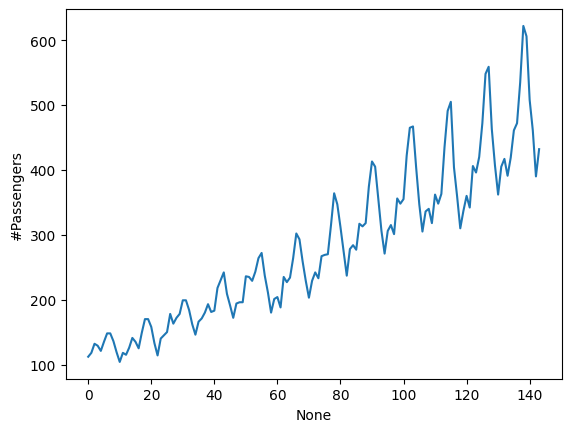

In [8]:
sns.lineplot(x=X3, y=y3)

In [10]:
import plotly.graph_objects as go
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({
#     'X': [1, 2, 3, 4, 5],
#     'Y1': [10, 11, 12, 13, 14],
#     'Y2': [15, 16, 17, 18, 19],
#     'Y3': [20, 21, 22, 23, 24]
# })

# Create a figure
fig = go.Figure()

# Add traces for each Y column
c = 0
for i, row in air_df.iterrows():
    fig.add_trace(go.Scatter(x=air_X, y=row.y, name=f"{c}"))
    c += 1

# Create dropdown
# Set the initial y-axis range
fig.update_layout(yaxis=dict(range=[5, 30]))  # Default y-axis range

fig.update_layout(
    width=1200,  # Set the width of the plot
    height=600,  # Set the height of the plot
)


# Add slider for controlling the y-axis range
fig.update_layout(
    sliders=[
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Min: '},
            'pad': {'t': 50},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[0]': i}]} 
                for i in range(-200, 200)  # Min y value range (0 to 20)
            ]
        },
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Max: '},
            'pad': {'t': 100},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[1]': i}]} 
                for i in range(0, 700)  # Max y value range (20 to 50)
            ]
        }
    ]
)

# Set the title and display the figure
fig.update_layout(title='Interactive Data Selection')
fig.show()


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_scaleds = []
for i, row in air_df.iterrows():
    y_scaled = scaler.fit_transform(np.c_[row.y])
    y_scaleds.append(y_scaled)

air_df["y_scaled"] = y_scaleds

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [56]:
air_df.head()

interval                                               func  \
0  120-119|0                                   337.000000000000   
1  120-118|0                           26.999872*x0 - 2875.9849   
2  120-117|0  -2.9924748*cos(x0) + 347.25122 - 6.9382586/cos...   
3  120-116|0  -x0*(cos(1.04787082602924*cos(x0 + 0.20102665)...   
4  120-115|0  (x0 + sin(x0))*sin(sin(x0)) - 129.30261*cos(co...   

                                                   y  \
0                                              337.0   
1  [-2875.9849, -2848.985028, -2821.9851559999997...   
2  [337.3204866, 332.79294089509284, 365.16915019...   
3  [0.330797122861223, 2.9548595708628493, 6.4926...   
4  [433.02168248993803, 397.4552186687538, 435.15...   

                                            y_scaled  
0  [[0.0], [0.006993006993006993], [0.01398601398...  
1  [[0.0], [0.006993006993006993], [0.01398601398...  
2  [[0.0], [0.006993006993006993], [0.01398601398...  
3  [[0.0], [0.006993006993006993], [0.01398601398...  
4  [[0.0], [0.006993006993006993], [0.01398601398...

In [58]:
import plotly.graph_objects as go
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({
#     'X': [1, 2, 3, 4, 5],
#     'Y1': [10, 11, 12, 13, 14],
#     'Y2': [15, 16, 17, 18, 19],
#     'Y3': [20, 21, 22, 23, 24]
# })

# Create a figure
fig = go.Figure()

# Add traces for each Y column
c = 0
for i, row in air_df.iterrows():
    fig.add_trace(go.Scatter(x=X, y=row.y_scaled, name=f"{c}"))
    c += 1

# Create dropdown
# Set the initial y-axis range
fig.update_layout(yaxis=dict(range=[0, 1]))  # Default y-axis range

fig.update_layout(
    width=1200,  # Set the width of the plot
    height=600,  # Set the height of the plot
)


# Add slider for controlling the y-axis range
fig.update_layout(
    sliders=[
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Min: '},
            'pad': {'t': 50},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[0]': i}]} 
                for i in range(-200, 200)  # Min y value range (0 to 20)
            ]
        },
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Max: '},
            'pad': {'t': 100},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[1]': i}]} 
                for i in range(0, 700)  # Max y value range (20 to 50)
            ]
        }
    ]
)

# Set the title and display the figure
fig.update_layout(title='Interactive Data Selection')
fig.show()


# Looking At The Data

In [7]:
with open(r"E:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\SRRollingMetric\Outputs\Seco\RollingMetric-108-49-0.pkl", "rb") as file:
    info = pickle.load(file)

info

{'108-107|0': 65.8099988221692,
 '108-106|0': 78.008705 - 33.58681*sin(x0),
 '108-105|0': 66.6041 - 0.8469425/cos(x0) + 0.0997510300000073/cos(x0)**2,
 '108-104|0': 1.0*sin(exp(-sin(exp(cos(x0))))) + 96.536415 - 12.261993/sin(0.999070325225695*sin(x0) + 0.0431101525562508*cos(x0)),
 '108-103|0': -4.378635*sin(0.486404833836858*x0) + 100.48551 - 13.229158/sin(x0),
 '108-102|0': -1.0*x0 - 0.25204647*x0/cos(cos(1.69981460971959*cos(exp(sin(sin(x0)))))) + 375.11487,
 '108-101|0': 117.008817023894*sin(exp(cos(1.1326065*sin(0.90989786*x0) - 0.29520924053835))) + 2.48406879763976*exp(-cos(x0)),
 '108-100|0': 7.48247804025105*sin(x0) - 42.749805 + 282.01678*exp(-cos(cos(3.5990188882151*sin(sin(x0))))),
 '108-99|0': -0.41678497819142*exp(exp(-cos(1.77657318220144*x0))) + 190.81242*exp(-cos(cos(exp(4.39755865133912*sin(x0))))),
 '108-98|0': 129.05382*cos(cos(cos(exp(4.39561154451108*sin(x0))))) - 1.0*exp(-cos(0.39455917*x0)),
 '108-97|0': -8.56320041041995 + 204.86243*exp(-cos(cos(exp(4.39738311

In [8]:
interval = list(info.keys())
funcs = list(info.values())

df = pd.DataFrame()
df["interval"] = interval
df["func"] = funcs

df

interval                                               func
0   108-107|0                                   65.8099988221692
1   108-106|0                       78.008705 - 33.58681*sin(x0)
2   108-105|0  66.6041 - 0.8469425/cos(x0) + 0.09975103000000...
3   108-104|0  1.0*sin(exp(-sin(exp(cos(x0))))) + 96.536415 -...
4   108-103|0  -4.378635*sin(0.486404833836858*x0) + 100.4855...
5   108-102|0  -1.0*x0 - 0.25204647*x0/cos(cos(1.699814609719...
6   108-101|0  117.008817023894*sin(exp(cos(1.1326065*sin(0.9...
7   108-100|0  7.48247804025105*sin(x0) - 42.749805 + 282.016...
8    108-99|0  -0.41678497819142*exp(exp(-cos(1.7765731822014...
9    108-98|0  129.05382*cos(cos(cos(exp(4.39561154451108*sin...
10   108-97|0  -8.56320041041995 + 204.86243*exp(-cos(cos(exp...
11   108-96|0  -1.6529014*x0 + 419.4428459 - 2.0774288/cos(1....
12   108-95|0  40.4963245738298*exp(cos(cos(exp(exp(sin(2.543...
13   108-94|0  10.7512119034838*sin(x0**2) + 29.11686*sin(0.6...
14   108-93|0  -x0 - 23.807188*sin((23.807188*sin(x0) - 19.38...
15   108-92|0  97.07354 - 22.9456001123417*sin(sin(x0) - sin(...
16   108-91|0  -4.64244665109219*sin(97.07137*x0) + 23.232855...
17   108-90|0  27.9397507215441*cos(x0**2 - cos(0.20899421*x0...
18   108-89|0  122.3246852 - 19.100176*exp(-cos(x0**2 - sin(0...
19   108-88|0  ((0.5302103*x0 - exp(4.061915*sin(0.58567905/s...
20   108-87|0  -115.68593*sin(0.05602368*x0) - 2.0929348/cos(x0)
21   108-86|0  exp(1.72135436072533*exp(sin(sin(0.07202906*x0...
22   108-85|0  0.56198645*x0 - 1.0*exp(4.12424247460817*sin(2...
23   108-84|0  (0.46341172*x0*(sin(2.026855*x0) - 0.049271148...
24   108-83|0                   x0*exp(-cos(cos(0.17024599*x0)))
25   108-82|0      95.31205 + 1.7582793/sin(1.22607459491783*x0)
26   108-81|0  95.330505 - 2.457612/(sin(0.402487096565549*x0...
27   108-80|0           95.6752 - 0.3519543/sin(x0 + 0.22199492)
28   108-79|0  0.29863876*x0/sin(sin(0.040304437*x0 + 0.04030...
29   108-78|0  4.10152673180301*exp(1.82810964118552*exp(cos(...
30   108-77|0  x0*exp(1.32531702080131*sin(0.051761903*x0*exp...
31   108-76|0  x0/(exp(cos(sin(0.26676658*x0) - 0.39798582)) ...
32   108-75|0  1.34630833503529*x0*exp(-sin(0.5540243 + 1.0*e...
33   108-74|0  1.34599472886928*x0*exp(-cos(cos(x0)/(2.020821...
34   108-73|0  exp(0.528226420759477*exp(-sin(0.0011825009256...
35   108-72|0  exp(exp(exp(exp(-cos(cos(1.9992274*exp(-cos(0....
36   108-71|0  -317.33636 - 2.1413102/sin(209.07501*x0) + 796...
37   108-70|0  1.0*exp(6.72441866391988*sin(0.08938477*x0) - ...
38   108-69|0  -2.1997502/sin(0.4950159 + exp(-cos(x0))) + 0....
39   108-68|0  118.302345 - 1.4658359/sin(0.397652071298062*x...
40   108-67|0  x0/(-0.843272636536592*x0 - 0.843272636536592*...
41   108-66|0  0.000147691783445211*exp(exp(exp(sin(0.0890934...
42   108-65|0  (111.251100429416*sin(x0) - 24.1522286863468 +...
43   108-64|0  exp(exp(0.12128684*exp(exp(sin(0.08920579*x0))...
44   108-63|0  x0*exp(-sin(exp(exp(sin(0.056761973*x0 + 0.056...
45   108-62|0  exp(exp((1.7840924*x0 + 10.8076942223169*sin(x...
46   108-61|0  x0*exp(sin(0.0907349*x0 - sin(2.03944032862726...
47   108-60|0          128.62466 + 5.0700274/sin(4.692631*x0**2)
48   108-59|0  101.385284 + 0.0236507294334321*exp(exp(exp(si...
49   108-58|0  exp(1.9954593662848*exp(sin(0.09011304*x0)) + ...
50   108-57|0  107.26118 + 4.6127/sin(15.362083*cos(exp(exp(-...
51   108-56|0  exp(exp(sin(0.0897965927580844*x0) + cos(cos(c...
52   108-55|0  x0*exp(-cos(sin(0.089891806*x0) - sin(7.479622...
53   108-54|0  x0*exp(-sin(0.07119577*x0) - sin(1.29113939438...
54   108-53|0  x0*exp(1.3961567184241*cos(4.2213283*sin(x0/(s...
55   108-52|0  (1.0*x0 - 1.3419684/sin(0.11928277*x0))*cos(co...
56   108-51|0  exp((sin(0.603693*x0) + 5.552114)*sin(0.089272...
57   108-50|0  1.31984196159558*x0*exp(cos(4.0086827*sin(2.45...
58   108-49|0  x0*exp(-sin(2.54344813483225*sin(exp(sin(0.090...

In [9]:
x0 = smp.symbols("x0")

ys = []
X = np.linspace(0, 300, 301)

for i, row in df.iterrows():
    lamb = smp.lambdify([x0], row.func)   
    y = lamb(X)
    ys.append(np.array(y))

df["y"] = ys
    

<lambdifygenerated-5>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-14>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-14>:2: RuntimeWarning:

invalid value encountered in sin

<lambdifygenerated-17>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-17>:2: RuntimeWarning:

invalid value encountered in sin

<lambdifygenerated-20>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-20>:2: RuntimeWarning:

invalid value encountered in sin

<lambdifygenerated-26>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-27>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-33>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-35>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-35>:2: RuntimeWarning:

overflow encountered in exp

<lambdifygenerated-37>:2: RuntimeWarning:

divide 

In [10]:
df

interval                                               func  \
0   108-107|0                                   65.8099988221692   
1   108-106|0                       78.008705 - 33.58681*sin(x0)   
2   108-105|0  66.6041 - 0.8469425/cos(x0) + 0.09975103000000...   
3   108-104|0  1.0*sin(exp(-sin(exp(cos(x0))))) + 96.536415 -...   
4   108-103|0  -4.378635*sin(0.486404833836858*x0) + 100.4855...   
5   108-102|0  -1.0*x0 - 0.25204647*x0/cos(cos(1.699814609719...   
6   108-101|0  117.008817023894*sin(exp(cos(1.1326065*sin(0.9...   
7   108-100|0  7.48247804025105*sin(x0) - 42.749805 + 282.016...   
8    108-99|0  -0.41678497819142*exp(exp(-cos(1.7765731822014...   
9    108-98|0  129.05382*cos(cos(cos(exp(4.39561154451108*sin...   
10   108-97|0  -8.56320041041995 + 204.86243*exp(-cos(cos(exp...   
11   108-96|0  -1.6529014*x0 + 419.4428459 - 2.0774288/cos(1....   
12   108-95|0  40.4963245738298*exp(cos(cos(exp(exp(sin(2.543...   
13   108-94|0  10.7512119034838*sin(x0**2) + 29.11686*sin(0.6...   
14   108-93|0  -x0 - 23.807188*sin((23.807188*sin(x0) - 19.38...   
15   108-92|0  97.07354 - 22.9456001123417*sin(sin(x0) - sin(...   
16   108-91|0  -4.64244665109219*sin(97.07137*x0) + 23.232855...   
17   108-90|0  27.9397507215441*cos(x0**2 - cos(0.20899421*x0...   
18   108-89|0  122.3246852 - 19.100176*exp(-cos(x0**2 - sin(0...   
19   108-88|0  ((0.5302103*x0 - exp(4.061915*sin(0.58567905/s...   
20   108-87|0  -115.68593*sin(0.05602368*x0) - 2.0929348/cos(x0)   
21   108-86|0  exp(1.72135436072533*exp(sin(sin(0.07202906*x0...   
22   108-85|0  0.56198645*x0 - 1.0*exp(4.12424247460817*sin(2...   
23   108-84|0  (0.46341172*x0*(sin(2.026855*x0) - 0.049271148...   
24   108-83|0                   x0*exp(-cos(cos(0.17024599*x0)))   
25   108-82|0      95.31205 + 1.7582793/sin(1.22607459491783*x0)   
26   108-81|0  95.330505 - 2.457612/(sin(0.402487096565549*x0...   
27   108-80|0           95.6752 - 0.3519543/sin(x0 + 0.22199492)   
28   108-79|0  0.29863876*x0/sin(sin(0.040304437*x0 + 0.04030...   
29   108-78|0  4.10152673180301*exp(1.82810964118552*exp(cos(...   
30   108-77|0  x0*exp(1.32531702080131*sin(0.051761903*x0*exp...   
31   108-76|0  x0/(exp(cos(sin(0.26676658*x0) - 0.39798582)) ...   
32   108-75|0  1.34630833503529*x0*exp(-sin(0.5540243 + 1.0*e...   
33   108-74|0  1.34599472886928*x0*exp(-cos(cos(x0)/(2.020821...   
34   108-73|0  exp(0.528226420759477*exp(-sin(0.0011825009256...   
35   108-72|0  exp(exp(exp(exp(-cos(cos(1.9992274*exp(-cos(0....   
36   108-71|0  -317.33636 - 2.1413102/sin(209.07501*x0) + 796...   
37   108-70|0  1.0*exp(6.72441866391988*sin(0.08938477*x0) - ...   
38   108-69|0  -2.1997502/sin(0.4950159 + exp(-cos(x0))) + 0....   
39   108-68|0  118.302345 - 1.4658359/sin(0.397652071298062*x...   
40   108-67|0  x0/(-0.843272636536592*x0 - 0.843272636536592*...   
41   108-66|0  0.000147691783445211*exp(exp(exp(sin(0.0890934...   
42   108-65|0  (111.251100429416*sin(x0) - 24.1522286863468 +...   
43   108-64|0  exp(exp(0.12128684*exp(exp(sin(0.08920579*x0))...   
44   108-63|0  x0*exp(-sin(exp(exp(sin(0.056761973*x0 + 0.056...   
45   108-62|0  exp(exp((1.7840924*x0 + 10.8076942223169*sin(x...   
46   108-61|0  x0*exp(sin(0.0907349*x0 - sin(2.03944032862726...   
47   108-60|0          128.62466 + 5.0700274/sin(4.692631*x0**2)   
48   108-59|0  101.385284 + 0.0236507294334321*exp(exp(exp(si...   
49   108-58|0  exp(1.9954593662848*exp(sin(0.09011304*x0)) + ...   
50   108-57|0  107.26118 + 4.6127/sin(15.362083*cos(exp(exp(-...   
51   108-56|0  exp(exp(sin(0.0897965927580844*x0) + cos(cos(c...   
52   108-55|0  x0*exp(-cos(sin(0.089891806*x0) - sin(7.479622...   
53   108-54|0  x0*exp(-sin(0.07119577*x0) - sin(1.29113939438...   
54   108-53|0  x0*exp(1.3961567184241*cos(4.2213283*sin(x0/(s...   
55   108-52|0  (1.0*x0 - 1.3419684/sin(0.11928277*x0))*cos(co...   
56   108-51|0  exp((sin(0.603693*x0) + 5.552114)*sin(0.089272...   
57   108-50|0  1.31984196159558*x0*exp(cos(4.0086827*sin(2.45

In [13]:
import plotly.graph_objects as go
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({
#     'X': [1, 2, 3, 4, 5],
#     'Y1': [10, 11, 12, 13, 14],
#     'Y2': [15, 16, 17, 18, 19],
#     'Y3': [20, 21, 22, 23, 24]
# })

# Create a figure
fig = go.Figure()

# Add traces for each Y column
c = 0
for i, row in df.iterrows():
    fig.add_trace(go.Scatter(x=X4, y=row.y, name=f"{c}"))
    c += 1

# Create dropdown
# Set the initial y-axis range
fig.update_layout(yaxis=dict(range=[5, 30]))  # Default y-axis range

fig.update_layout(
    width=1200,  # Set the width of the plot
    height=600,  # Set the height of the plot
)


# Add slider for controlling the y-axis range
fig.update_layout(
    sliders=[
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Min: '},
            'pad': {'t': 50},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[0]': i}]} 
                for i in range(-200, 200)  # Min y value range (0 to 20)
            ]
        },
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Max: '},
            'pad': {'t': 100},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[1]': i}]} 
                for i in range(0, 700)  # Max y value range (20 to 50)
            ]
        }
    ]
)

# Set the title and display the figure
fig.update_layout(title='Interactive Data Selection')
fig.show()


# Convergence Disk

The circle of convergence doesn't seem like a great option to analyse how it converges. It has too many pitfalls, it depends on the size of disk, the position of the center. We could normalize/standardize the data, but that changes it too much to make any sense of it, because there are accumulation in different sections of y axis, and we must normalize everything together. 

In [144]:
with open(r"E:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\SRRollingMetric\Outputs\Airplane\RollingMetric-120-85-0.pkl", "rb") as file:
    air_info = pickle.load(file)

interval = list(air_info.keys())
funcs = list(air_info.values())

air_df = pd.DataFrame()
air_df["interval"] = interval
air_df["func"] = funcs


x0 = smp.symbols("x0")
air_lamb = []

for i, row in air_df.iterrows():
    lamb = smp.lambdify([x0], row.func)   
    air_lamb.append(lamb)

air_df["lamb"] = air_lamb
    

In [66]:
air_df.head()

interval                                               func  \
0  120-119|0                                   337.000000000000   
1  120-118|0                           26.999872*x0 - 2875.9849   
2  120-117|0  -2.9924748*cos(x0) + 347.25122 - 6.9382586/cos...   
3  120-116|0  -x0*(cos(1.04787082602924*cos(x0 + 0.20102665)...   
4  120-115|0  (x0 + sin(x0))*sin(sin(x0)) - 129.30261*cos(co...   

                                                lamb  
0  <function _lambdifygenerated at 0x00000117BB05...  
1  <function _lambdifygenerated at 0x00000117BB05...  
2  <function _lambdifygenerated at 0x00000117BB05...  
3  <function _lambdifygenerated at 0x00000117BB05...  
4  <function _lambdifygenerated at 0x00000117BB05...

In [111]:
ys = []
X = np.linspace(0, 300, 301)

for i, row in air_df.iterrows():
    y = row.lamb(X)

    try:
        len(y)
    except:
        y = [y for _ in X]

    ys.append(y)
        

# Convert the list of y-values into a DataFrame for easier scaling
y_values_df = pd.DataFrame(ys)

y_values_df.replace([np.inf, -np.inf], np.nan, inplace=True)
y_values_df.interpolate(method='linear', axis=0, inplace=True)

# Initialize the scaler and fit to all Y values combined
scaler = MinMaxScaler()
scaled_y_values = scaler.fit_transform(y_values_df)

# Convert the scaled values back to the DataFrame structure
df_scaled = pd.DataFrame(scaled_y_values, columns=[f'Y{i+1}' for i in range(scaled_y_values.shape[1])])

df_scaled

<lambdifygenerated-349>:2: RuntimeWarning:

invalid value encountered in divide

<lambdifygenerated-350>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-350>:2: RuntimeWarning:

invalid value encountered in multiply

<lambdifygenerated-352>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-353>:2: RuntimeWarning:

divide by zero encountered in divide

<lambdifygenerated-354>:2: RuntimeWarning:

divide by zero encountered in divide



Y1        Y2        Y3        Y4        Y5        Y6        Y7  \
0   0.933266  0.054686  0.100183  0.158484  0.227944  0.298749  0.328382   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.933359  0.054614  0.101076  0.159507  0.229619  0.297288  0.328398   
3   0.835474  0.048952  0.089701  0.141976  0.204108  0.267349  0.293978   
4   0.961157  0.055723  0.103296  0.161171  0.234764  0.305508  0.332265   
5   0.952763  0.055851  0.102366  0.161874  0.232728  0.304898  0.335278   
6   0.949610  0.054415  0.099173  0.158286  0.236267  0.316369  0.345637   
7   0.966406  0.054542  0.099545  0.159442  0.235181  0.314169  0.344800   
8   0.983203  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
9   1.000000  0.058532  0.107809  0.170264  0.245248  0.319679  0.352653   
10  0.983636  0.056351  0.105235  0.165352  0.233504  0.300349  0.327629   
11  0.967273  0.056377  0.105221  0.165432  0.233604  0.300664  0.327997   
12  0.950909  0.055942  0.105225  0.166351  0.234131  0.300848  0.328746   
13  0.934546  0.055239  0.103027  0.166547  0.238939  0.305791  0.331323   
14  0.945504  0.056495  0.105350  0.163815  0.235240  0.303388  0.332288   
15  0.945829  0.056566  0.104546  0.164480  0.233577  0.303194  0.332545   
16  0.954918  0.055956  0.102487  0.162205  0.233404  0.306070  0.336533   
17  0.945663  0.056533  0.104483  0.164445  0.233637  0.303302  0.332535   
18  0.908480  0.053901  0.099069  0.155915  0.222477  0.290229  0.318765   
19  0.944717  0.055332  0.100693  0.157429  0.224696  0.296238  0.332039   
20  0.930795  0.054540  0.099914  0.158055  0.227323  0.297937  0.327555   
21  0.936486  0.054674  0.100065  0.158267  0.227686  0.298769  0.329917   
22  0.931606  0.054588  0.100003  0.158200  0.227530  0.298194  0.327831   
23  0.929187  0.054455  0.099814  0.157993  0.227274  0.297711  0.327007   
24  0.924750  0.054186  0.099260  0.157014  0.225824  0.296000  0.325502   
25  0.920255  0.053922  0.098783  0.156283  0.224888  0.295134  0.324747   
26  0.903558  0.053452  0.100020  0.161258  0.228832  0.293072  0.318405   
27  0.895430  0.052479  0.096192  0.152256  0.219045  0.286985  0.315180   
28  0.891677  0.052422  0.096731  0.153753  0.220669  0.287130  0.313822   
29  0.897300  0.052658  0.096800  0.153507  0.220603  0.288137  0.315811   
30  0.888896  0.052084  0.095421  0.150983  0.217286  0.285099  0.313696   
31  0.901477  0.052730  0.096395  0.152945  0.222765  0.298374  0.332375   
32  0.854049  0.049622  0.090548  0.143102  0.206126  0.271458  0.301395   
33  0.898605  0.052670  0.096602  0.153324  0.222576  0.297851  0.332989   
34  0.876361  0.051902  0.095364  0.150256  0.214732  0.280300  0.307702   

          Y8        Y9       Y10  ...      Y292      Y293      Y294      Y295  \
0   0.321096  0.313827  0.329455  ...  0.060951  0.068864  0.066870  0.047216   
1   0.000000  0.000000  0.000000  ...  1.000000  1.000000  1.000000  1.000000   
2   0.320967  0.319939  0.331740  ...  0.066841  0.072898  0.071353  0.043707   
3   0.287322  0.280988  0.295558  ...  0.173051  0.204326  0.175463  0.135123   
4   0.331378  0.318640  0.340350  ...  0.126613  0.087245  0.046802  0.013109   
5   0.328780  0.321594  0.337084  ...  0.126675  0.076219  0.054994  0.015245   
6   0.328802  0.315829  0.322671  ...  0.068551  0.059207  0.064555  0.060012   
7   0.330805  0.315299  0.326567  ...  0.068549  0.065293  0.063978  0.057388   
8   1.000000  1.000000  1.000000  ...  0.032138  0.005657  0.029056  0.005046   
9   0.344353  0.339843  0.353950  ...  0.000000  0.000000  0.000000  0.000000   
10  0.318783  0.312353  0.330635  ...  0.085553  0.100246  0.092152  0.057853   
11  0.319323  0.312855  0.331133  ...  0.087580  0.100252  0.090182  0.056607   
12  0.320041  0.312817  0.328576  ...  0.060001  0.065514  0.065687  0.046842   
13  0.321557  0.313238  0.328316  ...  0.061776  0.074377  0.081947  0.075998   
14  0.325607  0.314239  0.328259  ...  0.065163  0.068160 

In [112]:
import plotly.graph_objects as go
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({
#     'X': [1, 2, 3, 4, 5],
#     'Y1': [10, 11, 12, 13, 14],
#     'Y2': [15, 16, 17, 18, 19],
#     'Y3': [20, 21, 22, 23, 24]
# })

# Create a figure
fig = go.Figure()

# Add traces for each Y column
for c in range(1, 302):
    fig.add_trace(go.Scatter(x=X, y=df_scaled[f"Y{c}"], name=f"{c}"))
    

# Create dropdown
# Set the initial y-axis range
fig.update_layout(yaxis=dict(range=[0, 1]))  # Default y-axis range

fig.update_layout(
    width=1200,  # Set the width of the plot
    height=600,  # Set the height of the plot
)


# Add slider for controlling the y-axis range
fig.update_layout(
    sliders=[
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Min: '},
            'pad': {'t': 50},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[0]': i}]} 
                for i in range(-200, 200)  # Min y value range (0 to 20)
            ]
        },
        {
            'active': 0,
            'currentvalue': {'prefix': 'Y-axis Max: '},
            'pad': {'t': 100},
            'steps': [
                {'label': str(i), 'method': 'relayout', 'args': [{'yaxis.range[1]': i}]} 
                for i in range(0, 700)  # Max y value range (20 to 50)
            ]
        }
    ]
)

# Set the title and display the figure
fig.update_layout(title='Interactive Data Selection')
fig.show()


In [88]:
def calculate_convergence_disk(x, range, dataframe):
    n_inside = 0
    total = len(dataframe)

    for i, row in dataframe.iterrows():
        y = row.lamb(x)
        if -range[0] <= y <= range[1]:
            n_inside += 1

    return n_inside/total



In [90]:
convergence_rate = []
x_range = range(120, 250)

for i in x_range:
    convergence = calculate_convergence_disk(i, (200, 600), air_df)
    convergence_rate.append(convergence)

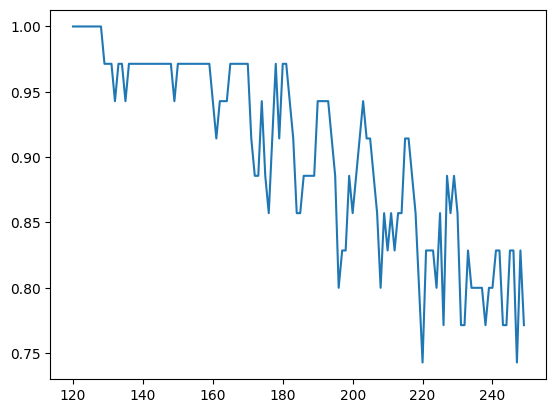

In [91]:
plt.plot(x_range, convergence_rate)

# Error Analysis

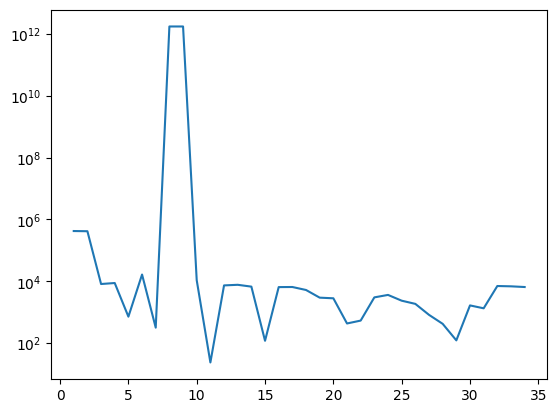

In [116]:
from sklearn.metrics import mean_squared_error

errors = []

X = np.linspace(120, 160, 41)
for i in range(1, len(air_df)):
    y1 = air_df.iloc[i-1].lamb(X)
    y2 = air_df.iloc[i].lamb(X)

    try:
        len(y1)
    except:
        y1 = [y1 for _ in X]

    try:
        len(y2)
    except:
        y2 = [y2 for _ in X]

    error = mean_squared_error(y1, y2)
    errors.append(error)

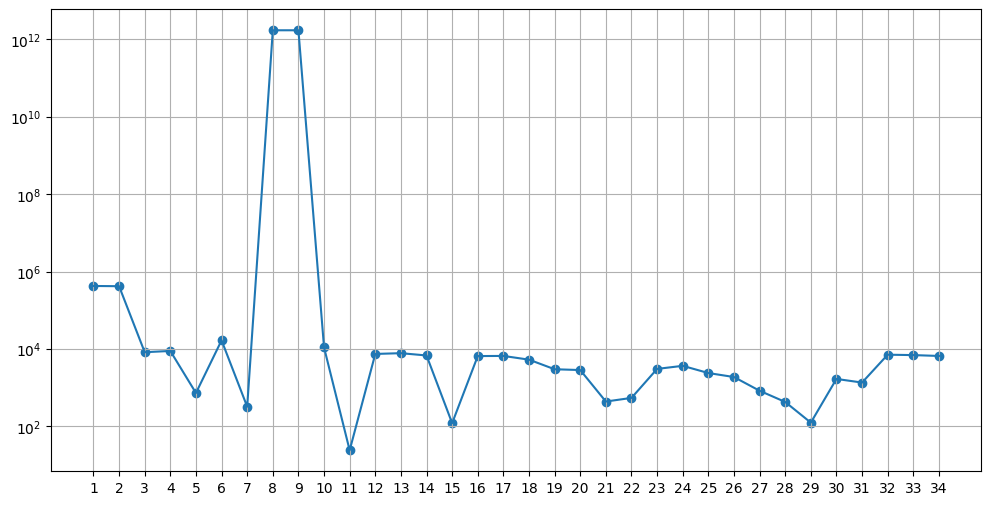

In [123]:
plt.figure(figsize=(12, 6))
plt.grid()

plt.plot(range(1, len(air_df)), errors)
plt.scatter(range(1, len(air_df)), errors)
plt.yscale("log")
plt.xticks(range(1, len(air_df)))
plt.show()

# Heatmap Erro

In [148]:
ys = []
X = np.linspace(120, 220, 101)
for i, row in air_df.iterrows():
    y = row.lamb(X)

    try:
        len(y)
    except:
        y = [y for _ in X]

    ys.append(y)

air_df["y"] = ys

In [173]:
air_df

interval                                               func  \
0   120-119|0                                   337.000000000000   
1   120-118|0                           26.999872*x0 - 2875.9849   
2   120-117|0  -2.9924748*cos(x0) + 347.25122 - 6.9382586/cos...   
3   120-116|0  -x0*(cos(1.04787082602924*cos(x0 + 0.20102665)...   
4   120-115|0  (x0 + sin(x0))*sin(sin(x0)) - 129.30261*cos(co...   
5   120-114|0  0.89097375*x0*sin(x0 + sin(0.31206203*sin(28.0...   
6   120-113|0  -32.53463*exp(sin(exp(sin(x0)))) - 104.883484*...   
7   120-112|0  -94.769356*sin(0.864839359115982*x0) + 1.04311...   
8   120-111|0  (-x0*exp(0.8463448/sin(x0)) + 10082.725*sin(0....   
9   120-110|0  -x0*sin(sin(0.865519103737658*x0) + 0.558875) ...   
10  120-109|0  79.0705978670232*exp(sin(0.672398324464063*x0)...   
11  120-108|0  76.6961414448344*exp(sin(0.6727141*x0)) + 293....   
12  120-107|0  29.928484*exp(1.86216701567401*sin(0.6175408*x...   
13  120-106|0  13.374505*exp(exp(sin(0.4532723*x0))) - exp(ex...   
14  120-105|0  37.50814*exp(sin(exp(-cos(x0))))*sin(0.5094048...   
15  120-104|0  69.8985960098107*sin(0.5089702*x0) + 38.308805...   
16  120-103|0  -x0*sin(0.5379676*x0 + sin(0.49160406*x0))*cos...   
17  120-102|0  70.0239706056177*sin(0.50896966*x0) + 36.62919...   
18  120-101|0  (x0 + (23.666496*sin(x0) + 299.32013)*exp(sin(...   
19  120-100|0  -65.6498576005351*sin(0.5365837*x0) + 37.77919...   
20   120-99|0  0.108493675285524*x0*exp(-3.109978*sin(sin(0.5...   
21   120-98|0  330.90958 + 17.1764420794552*exp(-2.2561857393...   
22   120-97|0  -1.0*x0*sin(2.201383 - 1.0*exp(-sin(0.53615953...   
23   120-96|0  x0*sin(sin(0.50887007*x0) - cos(sin(0.53408056...   
24   120-95|0  0.379419092450352*x0*exp(-1.4738922*sin(0.5366...   
25   120-94|0  0.738301751926712*x0*exp(-cos(exp(-cos(0.52199...   
26   120-93|0  x0 + 12.438251853455*exp(exp(sin(0.50759380638...   
27   120-92|0  1.0*x0/sin(exp(-sin(sin(0.507960838454383*x0))...   
28   120-91|0  2.71334488132915*x0*exp(sin(sin(0.509155610734...   
29   120-90|0  2.50195303278495*x0*exp(0.504746510008776*sin(...   
30   120-89|0  x0*exp(cos(1.89582552490195*sin(sin(cos(0.2612...   
31   120-88|0  x0 + 149.185768823518*exp(exp(-sin(cos(0.52188...   
32   120-87|0  2.7305326*x0 + 1.8126134 + 62.4643796874832*ex...   
33   120-86|0  x0 + 11.3903134860549*exp(exp(-cos(0.521923528...   
34   120-85|0  (x0 + (x0 + 18.1020192150762*sin(x0) + 183.273...   

                                                 lamb  \
0   <function _lambdifygenerated at 0x00000117BEFD...   
1   <function _lambdifygenerated at 0x00000117BADB...   
2   <function _lambdifygenerated at 0x00000117BADB...   
3   <function _lambdifygenerated at 0x00000117BADB...   
4   <function _lambdifygenerated at 0x00000117BADB...   
5   <function _lambdifygenerated at 0x00000117BADB...   
6   <function _lambdifygenerated at 0x00000117BAD6...   
7   <function _lambdifygenerated at 0x00000117BAD6...   
8   <function _lambdifygenerated at 0x00000117BAD6...   
9   <function _lambdifygenerated at 0x00000117BAD6...   
10  <function _lambdifygenerated at 0x00000117BAD6...   
11  <function _lambdifygenerated at 0x00000117BAD6...   
12  <function _lambdifygenerated at 0x00000117BAD6...   
13  <function _lambdifygenerated at 0x00000117BAD6...   
14  <function _lambdifygenerated at 0x00000117BAD6...   
15  <function _lambdifygenerated at 0x00000117BAD6...   
16  <function _lambdifygenerated at 0x00000117BAD6...   
17  <function _lambdifygenerated at 0x00000117BAD6...   
18  <function _lambdifygenerated at 0x00000117BAD6...   
19  <function _lambdifygenerated at 0x00000117BAD6...   
20  <function _lambdifygenerated at 0x00000117BAD6...   
21  <function _lambdifygenerated at 0x00000117BAD6...   
22  <function _lambdifygenerated at 0x00000117BADB...   
23  <function _lambdifygenerated at 0x00000117BADB...   
24  <function _lambdifygenerated at 0x00000117BADB...   
25  <function _lambdifygenerated at 0x00000117BEFD...   
26  <function _la

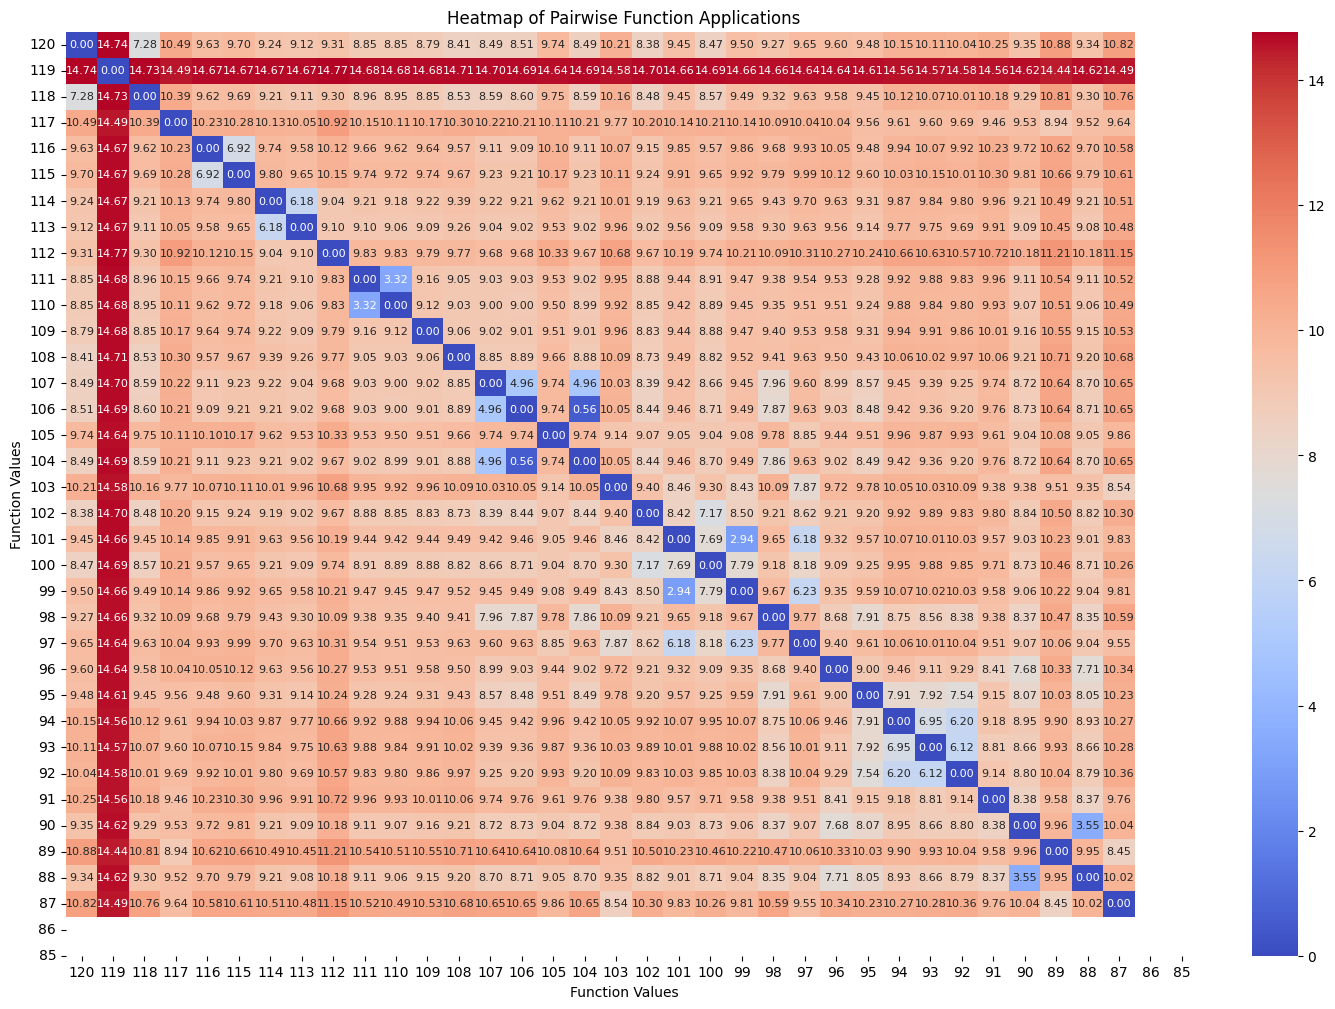

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# plt.figure(figsize=(12, 12))

# # Sample DataFrame
# data = {
#     'func': np.random.rand(10)  # 10 random values for demonstration
# }
# air_df = pd.DataFrame(data)

# Function to apply (example: simple product of two values)
def my_metric(x, y):
    error = mean_squared_error(x, y)  # You can replace this with any metric or function you want
    if error != 0:
        error = np.log(error)

    return error

# Create a matrix to hold the results
size = len(test_air_df)
heatmap_matrix = np.zeros((size, size))

# Populate the matrix with pairwise function applications
for i, j in itertools.product(range(size), repeat=2):
    heatmap_matrix[i, j] = my_metric(test_air_df.y.iloc[i], test_air_df.y.iloc[j])

# Create a heatmap using seaborn
plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=range(120, 84, -1), yticklabels=range(120, 84, -1),
            annot_kws={"size": 8})

# Set the title and display the plot
plt.title('Heatmap of Pairwise Function Applications')
plt.xlabel('Function Values')
plt.ylabel('Function Values')
plt.show()
